In [18]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
roosevelt=inaugural.raw('1941-Roosevelt.txt')
kennedy=inaugural.raw('1961-Kennedy.txt')
nixon=inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/swathi/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [20]:
df=pd.DataFrame({'speech':[roosevelt,kennedy,nixon]})
df.head()

,speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [21]:
df['speakers']=['roosevelt','kennedy','nixon']

In [22]:
df['totalwords'] = [len(x.split()) for x in df['speech'].tolist()]
df[['speakers','totalwords']].head()

,speakers,totalwords
0,roosevelt,1360
1,kennedy,1390
2,nixon,1819


In [23]:
df['word_count'] = df['speech'].apply(lambda x: len(str(x).split(" ")))
df[['speakers','word_count']].head()

,speakers,word_count
0,roosevelt,1323
1,kennedy,1364
2,nixon,1769


In [24]:
df['char_count'] = df['speech'].str.len() ## this also includes spaces
df[['speakers','char_count']].head()

,speakers,char_count
0,roosevelt,7571
1,kennedy,7618
2,nixon,9991


In [25]:
df['sentence_count'] = df['speech'].apply(lambda x: len(str(x).split("\n\n")))
df[['speakers','sentence_count']].head()

,speakers,sentence_count
0,roosevelt,38
1,kennedy,27
2,nixon,51


In [26]:
df[['speakers','char_count','word_count','sentence_count']].head()

,speakers,char_count,word_count,sentence_count
0,roosevelt,7571,1323,38
1,kennedy,7618,1364,27
2,nixon,9991,1769,51


In [10]:
speechDf=pd.DataFrame({'roosevelt':[roosevelt],
                     'kennedy':[kennedy],
                     'nixon':[nixon]})
speechDf.head()

,roosevelt,kennedy,nixon
0,On each national day of inauguration since 178...,"Vice President Johnson, Mr. Speaker, Mr. Chief...","Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swathi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
speechDf['roosevelt'] = speechDf['roosevelt'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speechDf['roosevelt'].head()
speechDf['roosevelt'] = speechDf['roosevelt'].str.replace('[^\w\s]','')
speechDf['roosevelt'].head()
from nltk.corpus import stopwords
stop = stopwords.words('english')
speechDf['roosevelt'] = speechDf['roosevelt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speechDf['roosevelt'].head()
freq = pd.Series(' '.join(speechDf['roosevelt']).split()).value_counts()[:30]
freq

nation        11
know          10
democracy      9
spirit         9
us             8
life           8
america        7
people         7
years          6
freedom        6
mind           5
speaks         5
human          5
states         4
nations        4
men            4
faith          4
body           4
new            4
day            4
something      4
government     4
must           4
person         3
united         3
live           3
destiny        3
every          3
first          3
world          3
dtype: int64

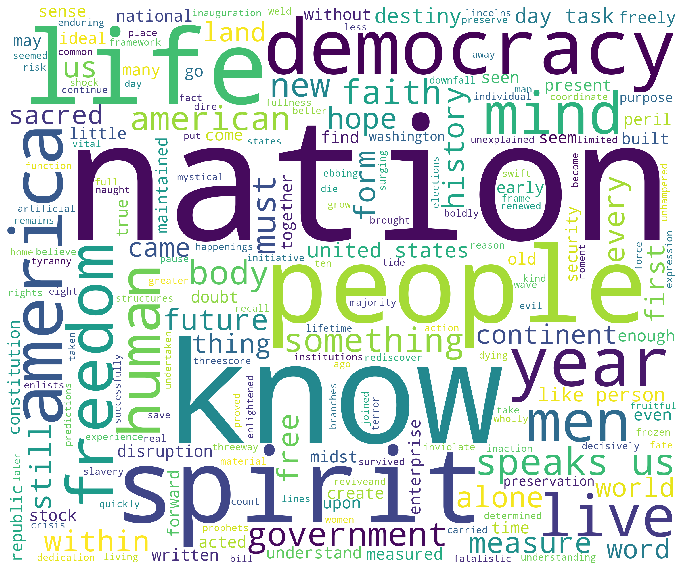

In [13]:
from wordcloud import WordCloud,STOPWORDS

words = ' '.join(speechDf['roosevelt'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
speechDf['kennedy'] = speechDf['kennedy'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speechDf['kennedy'].head()
speechDf['kennedy'] = speechDf['kennedy'].str.replace('[^\w\s]','')
speechDf['kennedy'].head()

stop = stopwords.words('english')
speechDf['kennedy'] = speechDf['kennedy'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speechDf['kennedy'].head()
freq = pd.Series(' '.join(speechDf['kennedy']).split()).value_counts()[:30]
freq

let          16
us           12
sides         8
world         8
pledge        7
new           7
power         5
free          5
citizens      5
ask           5
nations       5
shall         5
fellow        4
always        4
call          4
peace         4
man           4
freedom       4
arms          4
war           4
help          4
first         4
president     4
cannot        4
hope          4
americans     4
country       4
know          3
bear          3
final         3
dtype: int64

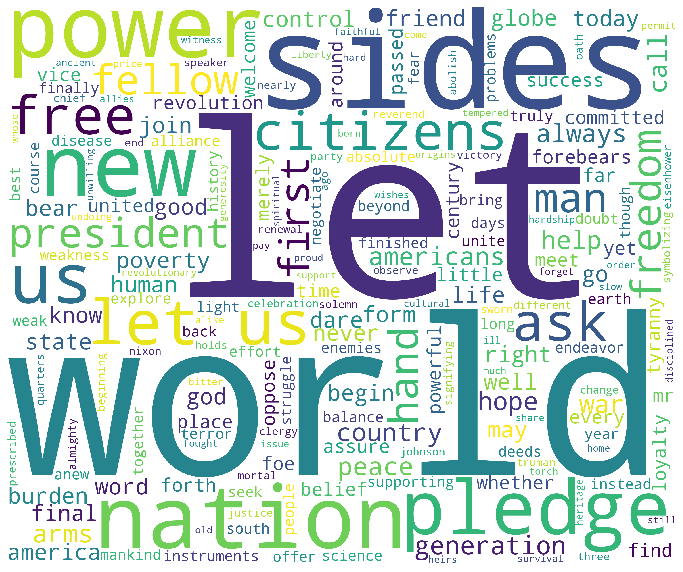

In [15]:
words = ' '.join(speechDf['kennedy'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
speechDf['nixon'] = speechDf['nixon'].apply(lambda x: " ".join(x.lower() for x in x.split()))

speechDf['nixon'] = speechDf['nixon'].str.replace('[^\w\s]','')


stop = stopwords.words('english')
speechDf['nixon'] = speechDf['nixon'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

freq = pd.Series(' '.join(speechDf['nixon']).split()).value_counts()[:30]
freq

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
home               9
great              9
nation             8
americas           8
abroad             8
better             7
role               7
years              7
every              7
together           7
policies           7
make               7
shall              7
history            7
time               6
right              6
help               6
people             6
nations            6
era                5
others             5
respect            5
dtype: int64

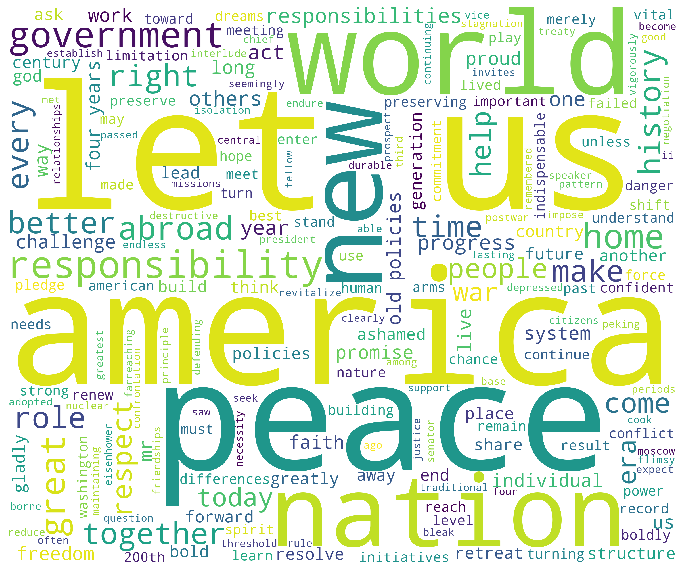

In [17]:
words = ' '.join(speechDf['nixon'])
cleaned_word = " ".join([word for word in words.split()])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()